# Monthly CO2 Emission Dataset for Each Coal and Natural Gas Burning Power Plant in the US from 2013-2020

Jason & Steve

In [128]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

In [130]:
path = os.getcwd()
parent = os.path.dirname(path)

## Abstract

To better control the emission of greenhouse gases, it is crucial that we can obtain detailed emission level estimates. CO2 emissions from fossil fuel burning power plants contribute significantly to the total anthropogenic greenhouse gas emissions yet the official emission estimates for them are mostly provided annually. This dataset will downscale annual CO2 emission estimates by using state-level electricity generation data to provide monthly CO2 emission data for all power plants in the United States. Our dataset will be useful for seasonal scale emission research, policy analysis, and demonstrate the potential of further downscaling power plant emissions using electricity generation data.

## Background and Summary

Global warming is one of the most critical challenges that threaten the sustainable development of all of mankind. The cause of the global warming crisis is the greenhouse gas effect, yet the greenhouse effect itself is just a natural phenomenon, it is the excess greenhouse gas emissions from anthropogenic activities that made it problematic. Among all anthropogenic emissions, we identified CO2 emission from fossil fuel combusting power plants as one of the key contributors to the overall global warming effect in the United States. In 2020, 79% of the total greenhouse gas emissions were CO2 and 31% of that come from the electric power industry, making power plants the second largest emitter of CO2 in this country(EPA, 2022).
 
To mitigate the impact of the global warming effect, numerous countries have proposed policies and agreements, such as the famous Paris Agreement, with ambitious targets to constrain or decrease the anthropogenic emission of greenhouse gases. In order to work towards these goals, it is essential that we can actually monitor the emission of greenhouse gases. However, this ever-increasing demand for greenhouse gas emissions monitoring is not so easy to be satisfied as the actual process to obtain emission levels is not as straightforward as it seems. Unlike more tangible pollutants such as solid waste, gaseous pollutants cannot be measured directly, instead, their emissions must be estimated using mathematical models. Emission modeling can be done in various ways, but the general approach is to relate more easily measurable variables with emission levels using mathematical equations so that emission levels can be inferred and not measured directly. The kinds of input variables used will depend on the emission source, different sources of emissions will be influenced by different factors and will hence be modeled independently(Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990-2014, 2016). In the case of fossil fuel burning power plants, emissions can be modeled fairly accurately with input-output production statistics. Relevant input variables include the type of fuel used, amount of energy generated, type of generator used, etc(Maksyutov et al., 2022). Different types of fuel have different compositions and will hence produce different amounts of emissions and will have different power generating capacities, combining detailed fuel data with the amount of power generated and other relevant data in the right way will give researchers an accurate estimate of the total amount of emission.
 
The problem for many official emission reports is the low temporal resolution. For example, in the case of the United States, only very large-scale power plants have data on monthly emission estimates, the emissions for all other power plants are given in annual totals. This level of temporal resolution does not provide much information and is not enough for more detailed research. Power plants as a major point source emitter, obtaining emission estimates with high temporal resolution is essential to understand their impact on the local environment and to better analyze emission-reducing practices. For example, if we were to compare greenhouse gas emissions in Atlanta during the summer and winter, knowing only the annual emission totals won’t be such help. The major difficulty of creating an emission data set with high temporal resolution is the long periods of time needed to collect and process the numerous amounts of data from all across the country. However, this painstaking task is based on a developed national census system and will be extremely difficult to further simply or accelerate. Since it is impossible to decrease the time period needed to directly produce emission estimates, we attempted to use proxy data that are correlated with greenhouse gas emissions and available in finer temporal resolutions to downscale annual emissions to finer temporal resolutions. Similar downscaling strategies are commonly used by scientists to achieve both finer spatial and temporal resolution. For example, nighttime light (NTL) data is capable of spatially downscaling urban carbon emissions based on assumptions that NTL data can potentially reflect socioeconomic conditions and human activities which are linked to carbon emissions (Cai et al., 2021). Using downscaling strategies, our goal is to create a dataset of CO2 emissions from power plants at monthly intervals to facilitate research that requires data on more detailed emission trends.



## Methods

This section will first describe the data we used and then explain our methodology in creating the dataset. The three major categories of data we used are power plant information data, emission estimates, and electricity generation data. All of our data are provided by the U.S Energy Information Administration (EIA). The EIA collects information on power plants on regular bases and calculates the estimated emission levels for each plant. Specifically, we used raw data obtained from Form EIA-860 and Form EIA-923, and processed datasets including the emission dataset for each power plant and the total electric power dataset.
 
For power plant information, we used Form EIA-860 and Form EIA-923. Form-860, the annual electric generator report, collects generator-level data for existing and planned generators and associated environmental equipment in power plants with 1 megawatt or greater capacity or any generator which have the ability to deliver or retrieve power from the grid. This 1-megawatt cutoff is consistent with all other power related data collected in the United States, generators of scale smaller than 1-megawatt annual capacity or the ones that are for personal use, such as solar panels above one’s rooftops, are considered much more trivial sources and are not included. This scale fits desired scale of our analysis as it covers the major emitters and will take much more work to include all emissions from every single generator in the country. This form is provided detailed information about the location of all generators, the type of fuel, the amount of electricity generated, etc. Data is available on an annual interval and dates back to 1990. This form provides exhaustive and uniform coverage of all power plants in the country but lacks detailed information. To address this issue, we used data from Form EIA-923 as a supplement for the EIA-860 form. This form is called Power Plant Operations Form and it provides us with more detailed information, including the type of environmental protection systems installed, monthly generation data for large power plants and etc. Unlike Form EIA-860 where data is collected uniformly for all respondents, Form EIA-923 assigns different sections depending on the generating capacity for each plant. This means that the dataset’s scale and scope are not uniform throughout all variables, and some detailed information is only available for certain power plants. For this dataset, we selected the power plants that offer complete monthly generation data.
 
For emission estimates and power generation data, we used pre-assembled datasets by the EIA. As explained previously, emission estimates were obtained using mathematical models that relate input variables with the output emissions, the EIA calculated the emissions based on the information collected by Form EIA-860 and Form EIA-923. The emission estimates were given in annual totals per power plant and the data are available since 2013. The electric power dataset is also created by the EIA based on national grid data. This dataset is released each month and contains information about the electricity generated nationwide during that month. We specifically used Table 1.3A of the dataset, this table gives the monthly total of electricity generated by utility scale generators of each state.
 
Our general approach to constructing the monthly powerplant emission is to relate annual emission totals with other relevant information for each power plant and then downscale the annual totals to monthly data based on the monthly power generated in each state. Since we have information on all power plants in the country, our first step is to identify the types of power plants that are actually capable of emitting carbon dioxide. We identified power plants that use coal and natural gas as the two topmost emitters, each contributing 66% and 32% of the total carbon dioxide emission from 2013 to 2020. (graph) Based on this information, we then narrowed our dataset to select all the power plants that use either coal or natural gas as their fuel source. Each plant was assigned a unique plant code which was uniform across all datasets and we used this code to merge the emission data with other plant-specific data provided in the two forms. After constructing the annual emission dataset, the next step is to downscale emissions. We believe that the level of emissions is related to the amount of electricity output so we use the electricity generation data as the proxy data for the downscaling process. We assumed that the emission fluctuations are synchronous with electricity generation fluctuations and monthly emission as a proportion of total annual emission is the same as the monthly generation to annual generation. The monthly fluctuations are calculated in two ways depending on the data available for each power plant. For powerplants with specific data, we used individual monthly fluctuations. For power plants that do not have plant-specific monthly generation data, we assumed that the monthly fluctuations at the state level are representative of the monthly emission fluctuations for all these individual power plants within the state that does not have detailed information. Specifically, we assumed that the power plants without detailed information generate electricity on the same proportional bases according to the fluctuations of the total generation of their state. For example, we will assume that power plants will decrease output by 10% if the state’s total output for that month decrease by 10%. Based on this assumption, we can approximate the monthly output of each power plant and hence, the monthly emission for each individual power plant even when specific data is not available.  


In [139]:
# declaring data

os.chdir(parent + '/dataset/yearly_emissions/')

years = list(range(2013, 2021))

frames = []

for y in years: 
    filename = 'emissions' + str(y) + '.xlsx'
    
    data_df = pd.read_excel(filename, header=1)
    
    data_df.insert(0, "Year", y)

    frames.append(data_df)
    
emission_df = pd.concat(frames, ignore_index=True).dropna(subset=['Plant Name'])


In [141]:
years = list(range(2013, 2021))

frames = []

for y in years: 
    filename = 'emissions' + str(y) + '.xlsx'
    
    data_df = pd.read_excel(filename, header=1)
    
    data_df.insert(0, "Year", y)

    frames.append(data_df)
    
emission_df = pd.concat(frames, ignore_index=True).dropna(subset=['Plant Name'])

## Technical validation
One of the key foundations of our dataset is the assumption that emission can be represented by power-generated data. To verify this assumption, we calculated the correlation between annual emissions and the total power generated in each state for coal and natural gas power plants separately. The data we used are directly from the reported annual emissions and grid data by the EIA. The results are shown below:
 
For both coal and natural gas, the R-squared value is greater than 0.95 indicating a near-linear relationship between annual emissions and electricity generated by the two types of power plants. This means that our strategy to use electricity generation as proxy data is valid.


## Usage Notes
This dataset has potential uses for conducting monthly scale emission analysis and construction of finer scale/larger coverage emission models.
 
When carrying out emission analysis, it is important that the scale of the data is consistent. Our data set can facilitate monthly level emission analysis by providing comprehensive emission estimates for all power plants in the country since 2013. With this data, we can better understand the temporal and spatial variations of power plant emissions, assess the impact of emission control policies, etc. It can also be used to cross-validate with other emission modeling techniques, such as top-down observation based modeling, to identify disparities and hence correct modeling biases.
 
Our dataset can also be incorporated into more comprehensive emission datasets. Power plant's emission data can be combined with other emission estimates into a comprehensive dataset that covers greenhouse gas emissions from various sources. We have also proven that our strategy of downscaling emissions using electricity generation as proxy data is feasible, making it possible for future research to further downscale CO2 emissions to finer scales with more detailed proxy data.
 
For ethical considerations, we have not identified any ethical issues worth considering in our dataset. Most of the information we used is legally required self-reported objective information and all of them are obtained from public sources. This dataset will only reveal information relevant to controlling global warming which is a crisis that threatens the whole of mankind equally.


In [92]:
df = pd.read_csv('monthly_generation_emission.csv')

In [93]:
# graph 2013 's total emission

_2013 = df[df['Year'] == 2013]

_2013_by_state = _2013.groupby('State', as_index=False).aggregate({
    'Emission (Predicted)': 'sum'})

fig = px.choropleth(_2013_by_state,
                    locations='State',
                    locationmode="USA-states",
                    scope="usa",
                    color=(_2013_by_state['Emission (Predicted)']),
                    color_continuous_scale="Viridis_r",
                    )
fig.show()


In [94]:
# graph 2020's total emission

_2020 = df[(df['Year'] == 2020) & (df['Aggregated Fuel Group'] == 'GAS')]

_2020_by_state = _2020.groupby('State', as_index=False).aggregate({'Emission (Predicted)': 'sum'})

fig = px.choropleth(_2020_by_state,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color=(_2020_by_state['Emission (Predicted)']),
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [116]:

df = pd.read_csv('monthly_generation_emission.csv')

df_by_month = df.groupby(['Year', 'Month'], as_index=False).aggregate(
    {'Emission (Predicted)': 'sum'})

mapper = {'Jan': 1,
          'Feb': 2,
          'Mar': 3, 
          'Apr': 4, 
          'May': 5, 
          'Jun': 6, 
          'Jul': 7, 
          'Aug': 8, 
          'Sep': 9,
          'Oct': 10,
          'Nov': 11,
          'Dec': 12}

df_by_month['Month'] = df_by_month['Month'].replace(mapper)

df_by_month['Date'] = df_by_month['Year'].astype(str) + '-' + df_by_month['Month'].astype(str) + '-1'

df_by_month['Date'] = pd.to_datetime(df_by_month['Date'])

In [123]:
df_by_month

,Year,Month,Emission (Predicted),Date
0,2013,4,3.278636e+08,2013-04-01
1,2013,8,3.862687e+08,2013-08-01
2,2013,12,3.664463e+08,2013-12-01
3,2013,2,3.419873e+08,2013-02-01
4,2013,1,3.609070e+08,2013-01-01
...,...,...,...,...
91,2020,3,2.497060e+08,2020-03-01
92,2020,5,2.408499e+08,2020-05-01
93,2020,11,2.534189e+08,2020-11-01
94,2020,10,2.606330e+08,2020-10-01


<AxesSubplot:xlabel='Date', ylabel='Emission (Predicted)'>

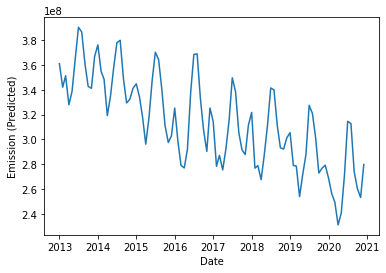

In [124]:
# plot

sns.lineplot(data=df_by_month, x='Date', y = 'Emission (Predicted)')


In [125]:
df_by_month

,Year,Month,Emission (Predicted),Date
0,2013,4,3.278636e+08,2013-04-01
1,2013,8,3.862687e+08,2013-08-01
2,2013,12,3.664463e+08,2013-12-01
3,2013,2,3.419873e+08,2013-02-01
4,2013,1,3.609070e+08,2013-01-01
...,...,...,...,...
91,2020,3,2.497060e+08,2020-03-01
92,2020,5,2.408499e+08,2020-05-01
93,2020,11,2.534189e+08,2020-11-01
94,2020,10,2.606330e+08,2020-10-01


## Worked Citied

1. Cai, M., Shi, Y., Ren, C., Yoshida, T., Yamagata, Y., Ding, C., & Zhou, N. (2021). The need for urban form data in spatial modeling of urban carbon emissions in China: A critical review. Journal of Cleaner Production, 319, 128792. https://doi.org/https://doi.org/10.1016/j.jclepro.2021.128792
2. EPA. (2022). Overview of Greenhouse Gases.  Retrieved from https://www.epa.gov/ghgemissions/overview-greenhouse-gases
3. Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990-2014. (2016).  Retrieved from https://www.epa.gov/sites/default/files/2017-04/documents/us-ghg-inventory-2016-main-text.pdf
4. Maksyutov, S., Brunner, D., Turner, A. J., Zavala-Araiza, D., Janardanan, R., Bun, R., Oda, T., & Patra, P. K. (2022). Chapter 14 - Applications of top-down methods to anthropogenic GHG emission estimation. In B. Poulter, J. G. Canadell, D. J. Hayes, & R. L. Thompson (Eds.), Balancing Greenhouse Gas Budgets (pp. 455-481). Elsevier. https://doi.org/https://doi.org/10.1016/B978-0-12-814952-2.00006-X
